In [122]:
import pandas as pd
import seaborn as sns

In [123]:
base_file_path = 'data/'

df = pd.read_csv(base_file_path+'polished2.csv')
bio_by_sport = df.groupby(['Sport'])[["Height", "BMI", "Age"]].median().reset_index()

In [124]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'BMI']], clusters)
    silhouette_scores.append(score)

In [125]:
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
7,9,0.346199
12,14,0.347658
8,10,0.372093
13,15,0.378956
11,13,0.389567
6,8,0.403015
14,16,0.403751
9,11,0.406201
16,18,0.410673
10,12,0.410971


<Axes: xlabel='k', ylabel='Score'>

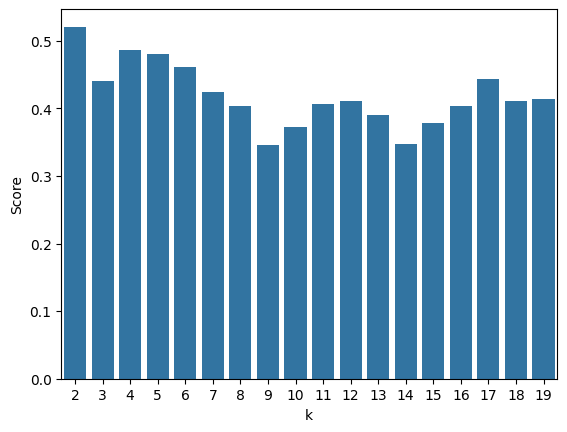

In [126]:
sns.barplot(data=silhouette_scores_df, x='k', y='Score')

<Axes: xlabel='Height', ylabel='BMI'>

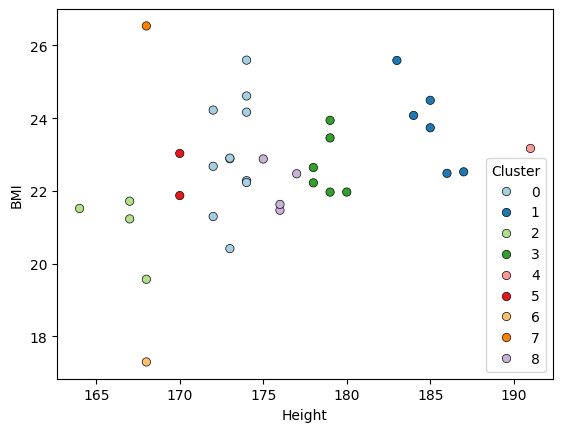

In [127]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[['Height', 'BMI']])
sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black')

In [128]:
bio_by_sport.sort_values(by='Cluster')

,Sport,Height,BMI,Age,Cluster
0,Archery,172.0,22.675737,25.0,0
2,Badminton,174.0,22.282592,26.0,0
6,Boxing,172.0,21.296296,23.0,0
10,Equestrianism,174.0,22.230987,33.0,0
13,Golf,173.0,22.885088,28.5,0
23,Shooting,174.0,24.163265,31.0,0
17,Judo,174.0,24.609375,25.0,0
16,Hockey,173.0,22.900098,25.0,0
21,Rugby Sevens,174.0,25.593737,26.0,0
31,Triathlon,173.0,20.415225,28.0,0


In [129]:
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age']])
    score = silhouette_score(bio_by_sport[['Height', 'Age']], clusters)
    silhouette_scores.append(score)

In [130]:
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
7,9,0.365782
6,8,0.377178
9,11,0.380776
17,19,0.381379
8,10,0.399325
5,7,0.403240
12,14,0.404491
15,17,0.404672
16,18,0.405758
10,12,0.406954


<Axes: xlabel='k', ylabel='Score'>

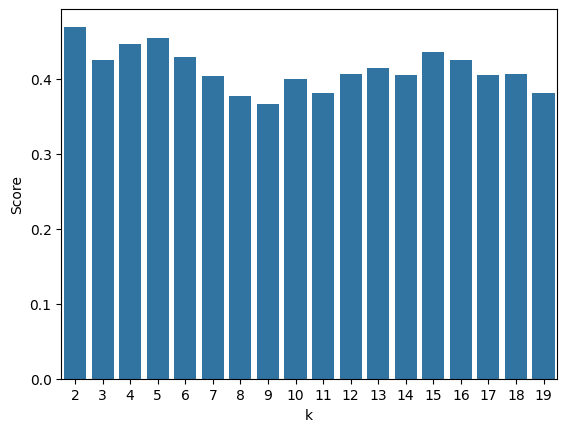

In [131]:
sns.barplot(data=silhouette_scores_df, x='k', y='Score')

<Axes: xlabel='Height', ylabel='Age'>

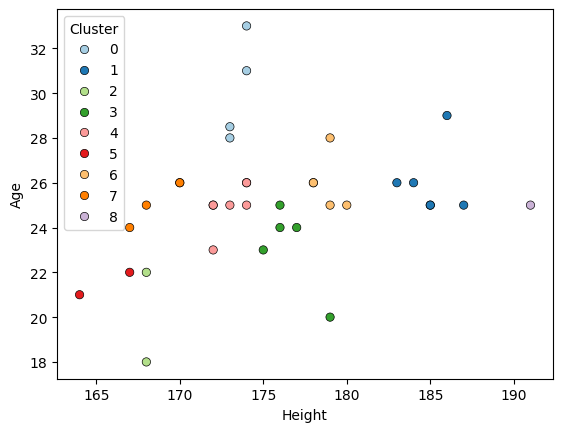

In [132]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[['Height', 'Age']])
sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black')

In [133]:
bio_by_sport.sort_values(by='Cluster')

,Sport,Height,BMI,Age,Cluster
13,Golf,173.0,22.885088,28.5,0
10,Equestrianism,174.0,22.230987,33.0,0
31,Triathlon,173.0,20.415225,28.0,0
23,Shooting,174.0,24.163265,31.0,0
15,Handball,184.0,24.074074,26.0,1
20,Rowing,185.0,23.735308,25.0,1
3,Baseball,183.0,25.585245,26.0,1
5,Beach Volleyball,186.0,22.482765,29.0,1
33,Water Polo,185.0,24.489796,25.0,1
32,Volleyball,187.0,22.524195,25.0,1


In [134]:
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['BMI', 'Age']])
    score = silhouette_score(bio_by_sport[['BMI', 'Age']], clusters)
    silhouette_scores.append(score)

In [135]:
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
7,9,0.283321
17,19,0.339630
16,18,0.371731
9,11,0.375881
5,7,0.382900
10,12,0.391118
8,10,0.394069
11,13,0.397124
15,17,0.400209
12,14,0.401108


<Axes: xlabel='k', ylabel='Score'>

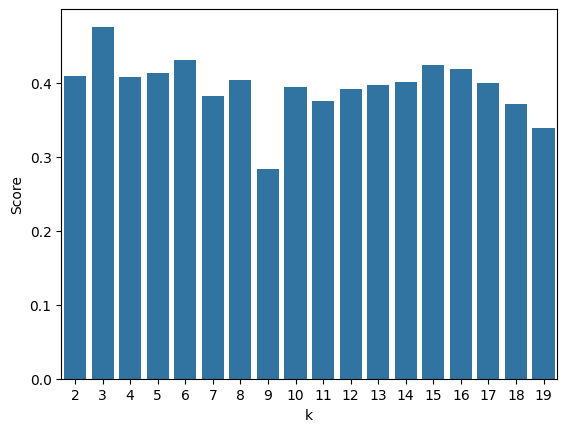

In [136]:
sns.barplot(data=silhouette_scores_df, x='k', y='Score')

<Axes: xlabel='BMI', ylabel='Age'>

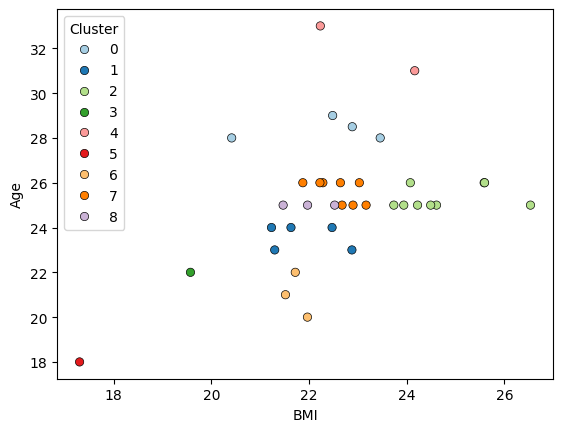

In [137]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[['BMI', 'Age']])
sns.scatterplot(data=bio_by_sport, x='BMI', y='Age', hue='Cluster', palette='Paired', edgecolor='black')

In [138]:
bio_by_sport.sort_values(by='Cluster')

,Sport,Height,BMI,Age,Cluster
5,Beach Volleyball,186.0,22.482765,29.0,0
13,Golf,173.0,22.885088,28.5,0
31,Triathlon,173.0,20.415225,28.0,0
22,Sailing,179.0,23.456790,28.0,0
12,Football,175.0,22.877406,23.0,1
28,Taekwondo,176.0,21.629649,24.0,1
8,Cycling,177.0,22.471209,24.0,1
6,Boxing,172.0,21.296296,23.0,1
30,Trampolining,167.0,21.230572,24.0,1
21,Rugby Sevens,174.0,25.593737,26.0,2


In [139]:
bio_by_sport = bio_by_sport._append({'Sport': 'Global average', 'Height': 162, 'BMI': 24.5, 'Age': 31}, ignore_index=True)
bio_by_sport

,Sport,Height,BMI,Age,Cluster
0,Archery,172.0,22.675737,25.0,7.0
1,Athletics,176.0,21.469150,25.0,8.0
2,Badminton,174.0,22.282592,26.0,7.0
3,Baseball,183.0,25.585245,26.0,2.0
4,Basketball,191.0,23.167430,25.0,7.0
5,Beach Volleyball,186.0,22.482765,29.0,0.0
6,Boxing,172.0,21.296296,23.0,1.0
7,Canoeing,179.0,23.938990,25.0,2.0
8,Cycling,177.0,22.471209,24.0,1.0
9,Diving,167.0,21.718066,22.0,6.0


In [140]:
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'BMI']], clusters)
    silhouette_scores.append(score)

In [141]:
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
17,19,0.241540
16,18,0.244937
15,17,0.278052
9,11,0.300451
14,16,0.303124
12,14,0.311385
10,12,0.312287
11,13,0.320391
8,10,0.322766
13,15,0.326013


<Axes: xlabel='k', ylabel='Score'>

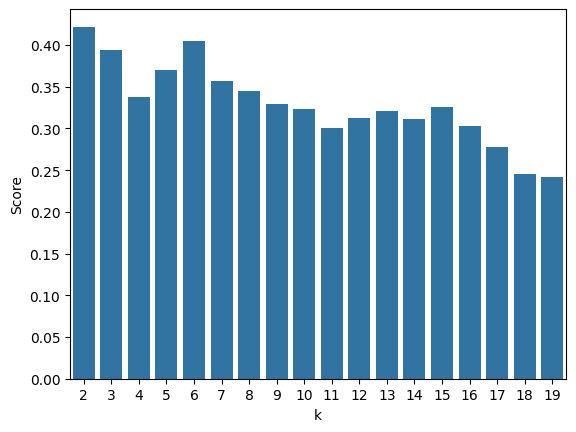

In [142]:
sns.barplot(data=silhouette_scores_df, x='k', y='Score')

In [143]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[['BMI', 'Age', 'Height']])
bio_by_sport.sort_values(by='Cluster')

,Sport,Height,BMI,Age,Cluster
13,Golf,173.0,22.885088,28.5,0
10,Equestrianism,174.0,22.230987,33.0,0
31,Triathlon,173.0,20.415225,28.0,0
23,Shooting,174.0,24.163265,31.0,0
15,Handball,184.0,24.074074,26.0,1
20,Rowing,185.0,23.735308,25.0,1
3,Baseball,183.0,25.585245,26.0,1
5,Beach Volleyball,186.0,22.482765,29.0,1
33,Water Polo,185.0,24.489796,25.0,1
32,Volleyball,187.0,22.524195,25.0,1


<Axes: xlabel='BMI', ylabel='Age'>

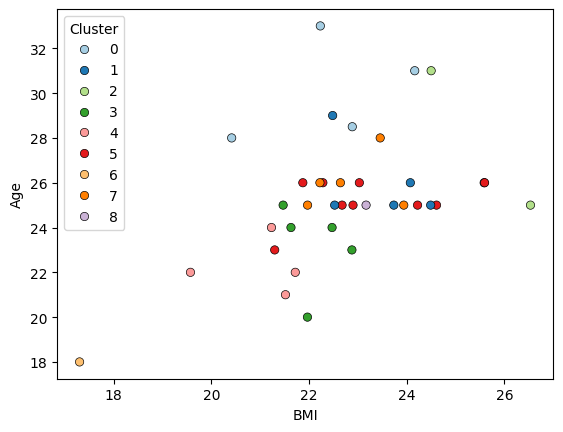

In [144]:
sns.scatterplot(data=bio_by_sport, x='BMI', y='Age', hue='Cluster', palette='Paired', edgecolor='black')

<Axes: xlabel='Height', ylabel='BMI'>

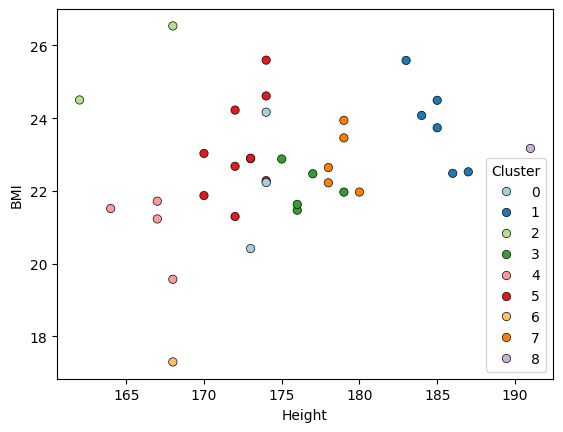

In [145]:
sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black')

<Axes: xlabel='Height', ylabel='Age'>

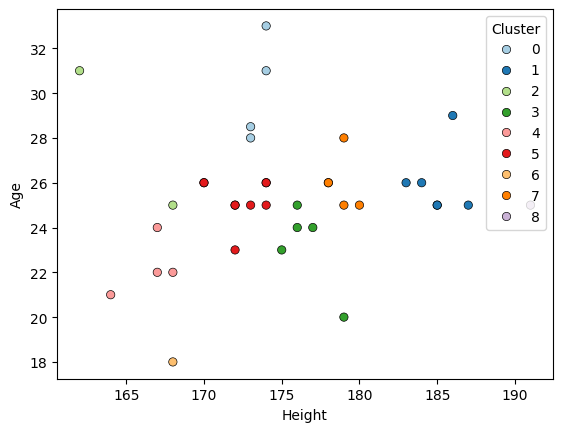

In [146]:
sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black')

<Axes: ylabel='Height'>

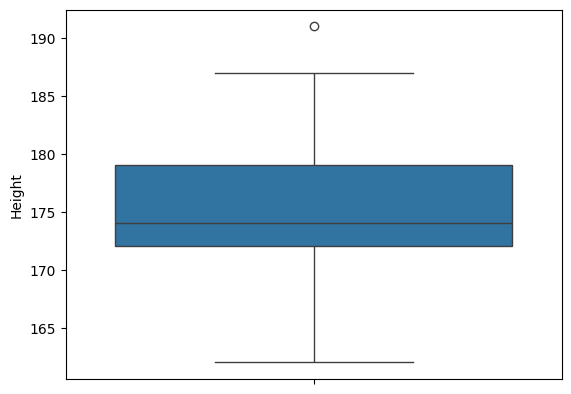

In [147]:
sns.boxplot(bio_by_sport['Height'])

<Axes: ylabel='BMI'>

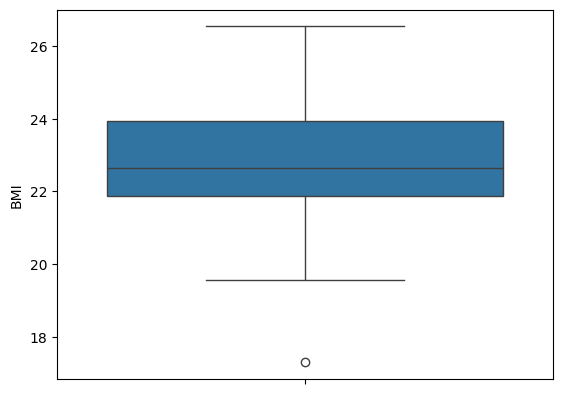

In [148]:
sns.boxplot(bio_by_sport['BMI'])

<Axes: ylabel='Age'>

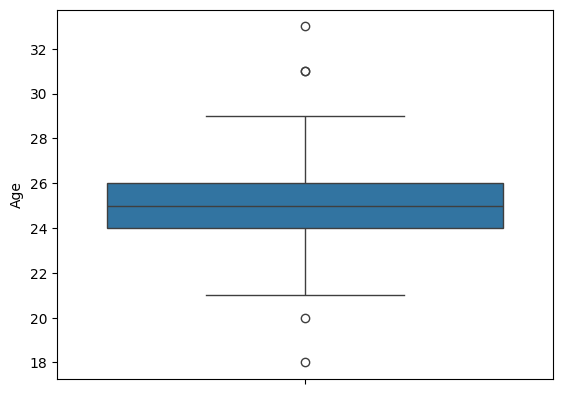

In [149]:
sns.boxplot(bio_by_sport['Age'])

In [150]:
bio_by_sport[['Height', 'BMI', 'Age']].std(), 

(Height    6.704286
 BMI       1.725745
 Age       2.910837
 dtype: float64,)

In [151]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Height', 'BMI', 'Age']

scaler = StandardScaler()

bio_by_sport[columns_to_normalize] = scaler.fit_transform(bio_by_sport[columns_to_normalize])

bio_by_sport

,Sport,Height,BMI,Age,Cluster
0,Archery,-0.502690,-0.035706,-0.117663,5
1,Athletics,0.102173,-0.744518,-0.117663,3
2,Badminton,-0.200259,-0.266660,0.230620,5
3,Baseball,1.160683,1.673493,0.230620,1
4,Basketball,2.370409,0.253141,-0.117663,8
5,Beach Volleyball,1.614331,-0.149068,1.275467,1
6,Boxing,-0.502690,-0.846062,-0.814228,5
7,Canoeing,0.555820,0.706396,-0.117663,7
8,Cycling,0.253389,-0.155856,-0.465946,3
9,Diving,-1.258769,-0.598292,-1.162511,4


In [152]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'BMI']], clusters)
    silhouette_scores.append(score)

In [153]:
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
7,9,0.209836
8,10,0.217996
2,4,0.221953
5,7,0.222534
6,8,0.232051
1,3,0.247954
4,6,0.305652
3,5,0.324883
0,2,0.342707


In [154]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[['BMI', 'Age', 'Height']])
bio_by_sport.sort_values(by='Cluster')

,Sport,Height,BMI,Age,Cluster
13,Golf,-0.351475,0.087278,1.101326,0
22,Sailing,0.555820,0.423126,0.927185,0
23,Shooting,-0.200259,0.838147,1.972032,0
36,Global average,-2.014848,1.035963,1.972032,0
25,Swimming,0.555820,-0.451985,-1.859076,1
26,Synchronized Swimming,-1.107553,-1.859192,-1.162511,1
9,Diving,-1.258769,-0.598292,-1.162511,1
6,Boxing,-0.502690,-0.846062,-0.814228,1
30,Trampolining,-1.258769,-0.884672,-0.465946,1
14,Gymnastics,-1.712416,-0.716442,-1.510793,1


<Axes: xlabel='Height', ylabel='BMI'>

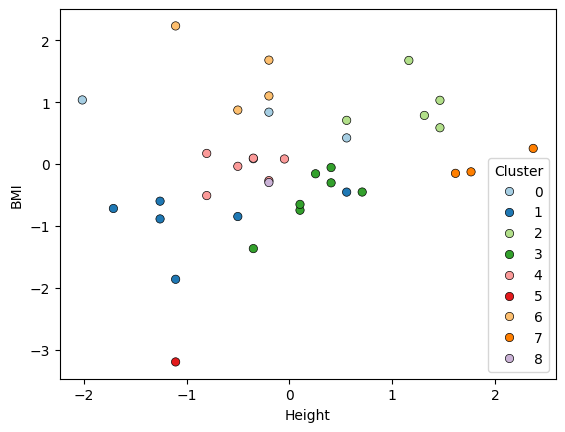

In [155]:
sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black')

<Axes: xlabel='Height', ylabel='Age'>

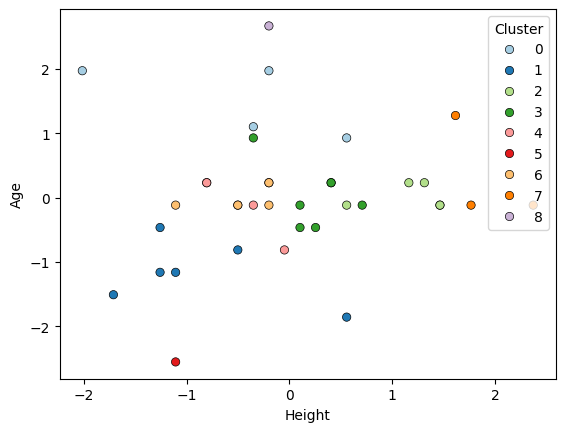

In [156]:
sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black')

<Axes: xlabel='Age', ylabel='BMI'>

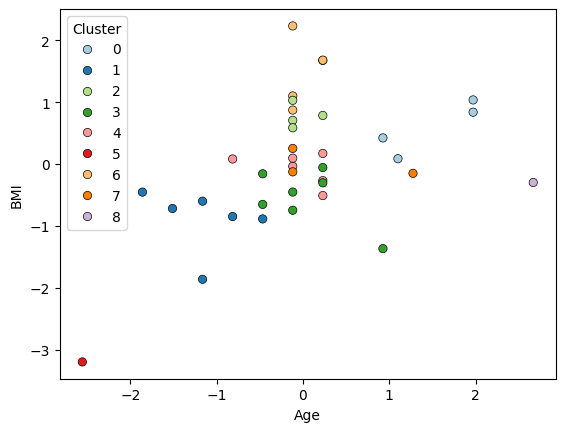

In [157]:
sns.scatterplot(data=bio_by_sport, x='Age', y='BMI', hue='Cluster', palette='Paired', edgecolor='black')

In [158]:
df["CI"] = df['Weight'] / ((df['Height'] / 100) ** 3)
bio_by_sport = df.groupby(['Sport'])[["Height", "CI", "Age"]].median().reset_index()
columns_to_normalize = ['Height', 'CI', 'Age']

scaler = StandardScaler()

bio_by_sport[columns_to_normalize] = scaler.fit_transform(bio_by_sport[columns_to_normalize])

bio_by_sport.head()

,Sport,Height,CI,Age
0,Archery,-0.585030,0.270175,-0.065678
1,Athletics,0.048386,-0.706947,-0.065678
2,Badminton,-0.268322,-0.219020,0.298075
3,Baseball,1.156863,1.140568,0.298075
4,Basketball,2.423694,-0.754315,-0.065678


In [159]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'CI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'CI']], clusters)
    silhouette_scores.append(score)
silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
6,8,0.230144
7,9,0.232296
8,10,0.240052
0,2,0.255092
2,4,0.260943
1,3,0.271600
4,6,0.274115
5,7,0.279897
3,5,0.299967


<Axes: xlabel='NOC freq', ylabel='Count'>

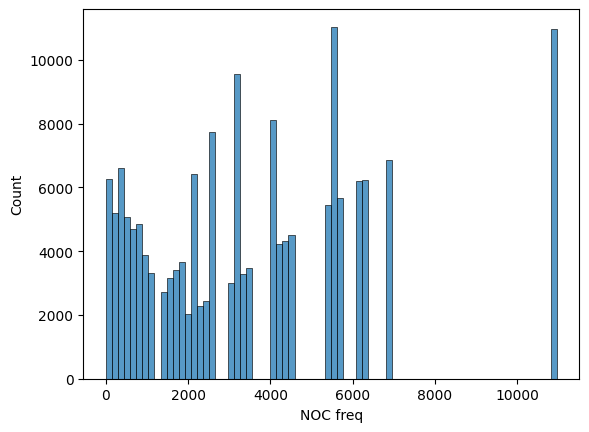

In [160]:
df['NOC freq'] = df.groupby('NOC')['NOC'].transform('size')
df.head()
sns.histplot(df['NOC freq'])